# Deep Learning in Virtual Screening: Recent Applications and Developments
## Review

### Figure generation
#### Complex encoding
This notebook serves to generate the complex encoding figure for the review.

Example complex structure:
- ROCK 1
    - [ROCK 1](https://www.uniprot.org/uniprot/Q13464) is a protein serine/threonine kinase also known as rho-associated, coiled-coil-containing protein kinase 1. 
    - PDB structure [2esm](https://www.rcsb.org/structure/2ESM) chosen as example.
- Bound compound: Fasudil
    - Taken from https://www.icoa.fr/pkidb/.
    - SMILES: c1cc2cnccc2c(c1)S(=O)(=O)N3CCCNCC3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from pathlib import Path

import nglview as nv
from rdkit import Chem
import matplotlib.pyplot as plt
import oddt.toolkits
from oddt.fingerprints import InteractionFingerprint
from oddt.fingerprints import SimpleInteractionFingerprint
from oddt.fingerprints import PLEC

HERE = Path(_dh[-1])
DATA = HERE / "data"

#### Show the structure of the protein and ligand.
The code below exemplifies how to generare a figure of the ligand binding site using [nglview](http://nglviewer.org/).

In [2]:
pdb_id = "2esm"

In [3]:
# show the complex based on PDB ID
ngl_viewer = nv.show_pdbid(pdb_id)

In [4]:
# add the ligands
ngl_viewer.add_representation(repr_type="ball+stick",
                              selection="hetero and not water")

In [5]:
# center view on binding site
ngl_viewer.center("ligand")

In [6]:
print('The structure of the complex between ROCK1 and fasudil:')
ngl_viewer

The structure of the complex between ROCK1 and fasudil:


NGLWidget()

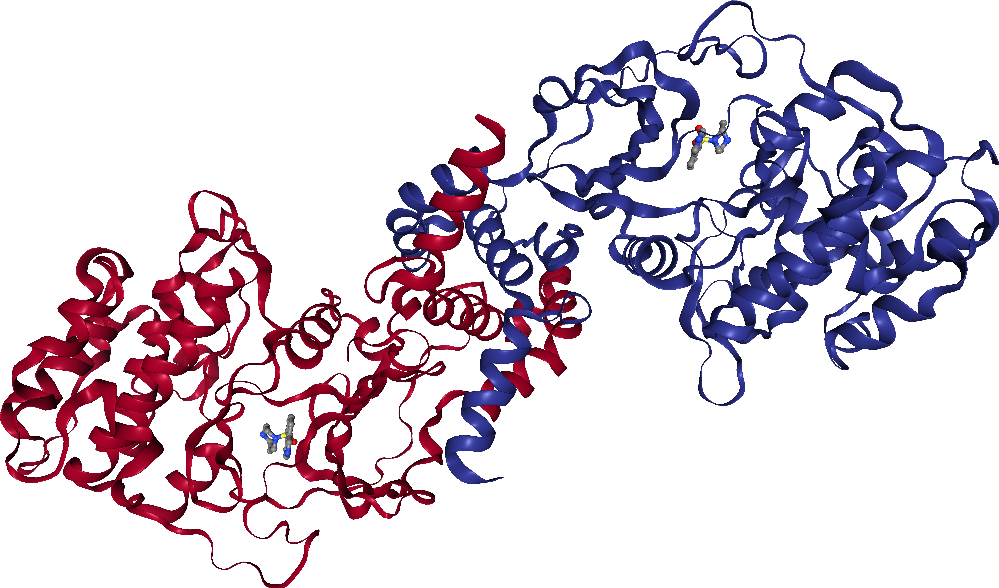

In [8]:
# render a static image
ngl_viewer.render_image(trim=True, factor=2, transparent=True)
ngl_viewer._display_image()

In [9]:
# SMILES of ligand
fasudil = "c1cc2cnccc2c(c1)S(=O)(=O)N3CCCNCC3"

The structure of fasudil:


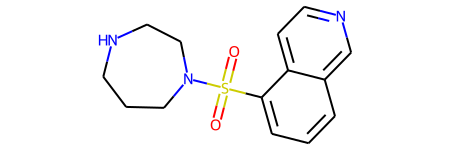

In [10]:
# Show the ligand
mol = Chem.MolFromSmiles(fasudil)
print('The structure of fasudil:')
mol

#### Interaction fingerprints
To generate protein-ligand fingerprints, we use the Open Drug Discovery Toolkit (oddt) [fingerprint functionality](https://oddt.readthedocs.io/en/latest/index.html?highlight=interaction%20fingerprint#interaction-fingerprints).

In [11]:
protein = next(oddt.toolkit.readfile('pdb', './data/protein.pdb'))
protein.protein = True
ligand = next(oddt.toolkit.readfile('sdf', './data/ligand.sdf'))

Generate the fingerprints:

In [12]:
ifp = InteractionFingerprint(ligand, protein)
sifp = SimpleInteractionFingerprint(ligand, protein)
plec = PLEC(ligand, protein, sparse=False)

In [13]:
# print the interaction fingerprint
print(ifp)

[0 0 0 ... 0 0 0]


In [14]:
# print the simple interaction fingerprint
print(sifp)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


Show the simple interaction fingerprint

In [15]:
f, ax = plt.subplots()
# show first 50 bits exemplarily
ax.imshow(np.reshape(sifp[:50], (1, 50)),
          cmap=colors.ListedColormap([(1, 1, 1), 'black']))
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.show()

In [16]:
# show the PLEC fingerprint
print(plec)

[0 0 0 ... 0 0 0]


#### 3D grid

To generate an exemplary grid box within the protein binding site, [pymol](https://en.wikipedia.org/wiki/PyMOL) is called via a bash script.

Note that the underlying script for drawing the grid (`drawgridbox.py`) is taken from Cunliang Geng. It is distributed under the following copyright statement: "This article is the original article of the CSDN blogger "DrugAI" and follows the CC 4.0 BY-SA copyright agreement."

Original link: https://blog.csdn.net/u012325865/article/details/103495156

In [17]:
# run the pymol script to generate the image.
! pymol -qc pymol_3d_grid_encoding.py

PyMOL>drawgridbox 20A, nx=10, ny=10, nz=10,  lw=0.5, g=0, b=0, r=0
Box dimensions (45.19, 41.27, 40.61)


The image of 3D grid encoding is generated in the `./data` folder.

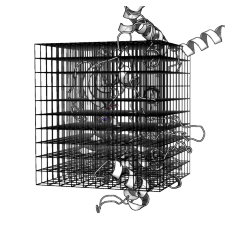

In [18]:
plt.axis('off')
plt.imshow(plt.imread('./data/pymol_3d_grid_encoding.png'))
plt.show()

_Note:_
a pymol session file (pse) is also generated within this directory, which can be used interactively (pymol GUI). 